In [1]:
### TD Classification : Prédire la survie des passagers du Titanic

##### 1) Les données : 
#fichier de données : titanic_data.csv

#variables descriptives: caractéristiques des passagers

#variable cible : vie ou mort du passager

#- Explorer et comprendre les données 
#- Nettoyer les données, missing values et outliers
#- Choisir les bonnes variables pour l'entraînement du modèle, distribution et corrélation
#- Transformer les données, scaling et encoding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv('data/titanic_data.csv')
validation = pd.read_csv('data/validation_data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


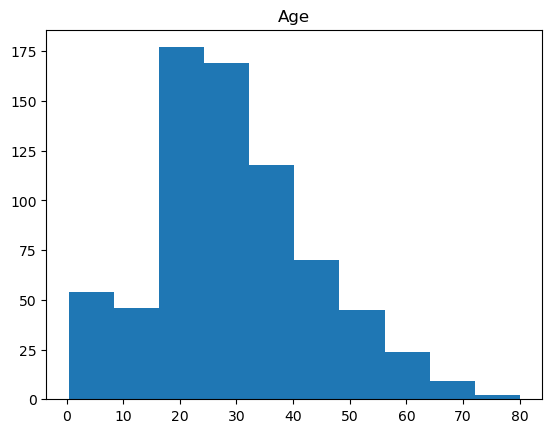

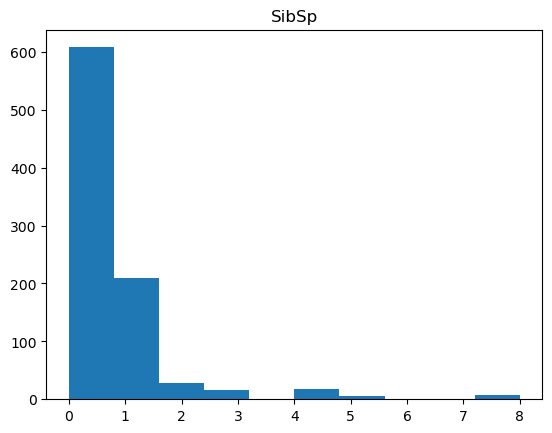

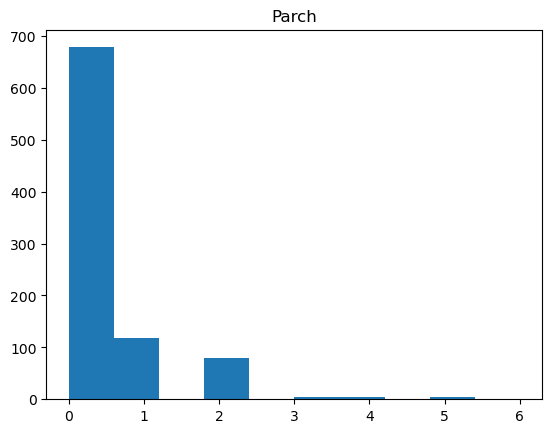

In [7]:
df_num = titanic[["Age", "SibSp", 'Parch']]

for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

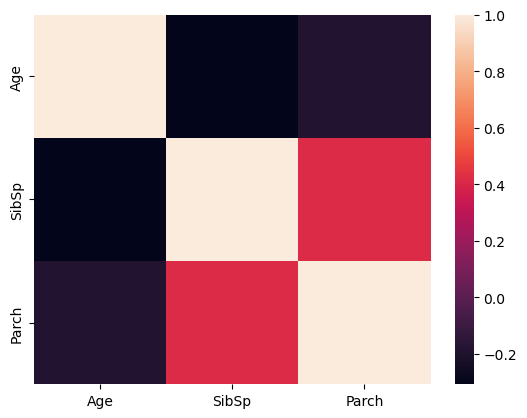

In [8]:
import seaborn as sns

sns.heatmap(df_num.corr())

In [9]:
# On enlève les colonnes 'Ticket' 'Cabin' 'Name' & 'PassengerId'
# Cabin aurait pu être utile à traiter 
titanic = titanic.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)

cols =  ["SibSp", "Parch", "Fare", "Age"]
for col in cols:
    titanic[col].fillna(titanic[col].mean(), inplace=True)

# Remplacer les Not Assigned par U pour Unknown
titanic.Embarked.fillna("U", inplace=True)

# Même chose pour le jeu de données de validation
validation = validation.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis=1)

cols =  ["SibSp", "Parch", "Fare", "Age"]
for col in cols:
    validation[col].fillna(validation[col].mean(), inplace=True)

validation.Embarked.fillna("U", inplace=True)


In [10]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
validation.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [12]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]
#Remplace les valeurs des colonnes 'Sex' & 'Embarked' par du binaire
for col in cols:
    titanic[col] = label.fit_transform(titanic[col])
    print(label.classes_)

for col in cols:
    validation[col] = label.fit_transform(validation[col])
    
titanic.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


##### 2) Entraîner un modèle de classification

- Séparer les features et les labels dans deux variables X et y
- Séparer les données en deux sous ensembles 70%-30% pour l'entraînement et le test
- Importer le modèle LogisticRegression de sklearn et proceder à l'entrainement sur l'ensemble d'entrainement

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Sépare les features et les labels dans deux variables X et y
y = titanic["Survived"]
X = titanic.drop("Survived", axis=1)

# Sépare les données en deux sous ensembles 70%-30% pour l'entraînement et le test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=18)

In [14]:
model = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

##### 3) Evaluer le modèle

- Faire les prédictions sur l'ensemble de données de test
- Calculer la precision et le recall
- Afficher la matrice de confusion
- Afficher la coube ROC et l'aire sous la courbe
- Expliquer les résultat en quelques phrases

In [15]:
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [16]:
predictions = model.predict(X_val)
accuracy_score(y_val, predictions)

0.8171641791044776

In [17]:
from sklearn. metrics import classification_report
from sklearn.metrics import precision_score, recall_score

# Calcule la precision et le recall
print("Overall Precision:",precision_score(y_val, predictions))
print("Overall Recall:",recall_score(y_val, predictions))

print(classification_report(y_val, predictions))

Overall Precision: 0.7916666666666666
Overall Recall: 0.7238095238095238
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       163
           1       0.79      0.72      0.76       105

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [18]:
from sklearn.metrics import confusion_matrix

# Affiche la matrice de confusion
cm = confusion_matrix(y_val, predictions)
print (cm)

[[143  20]
 [ 29  76]]


In [19]:
y_scores = model.predict_proba(X_val)
print(y_scores)

[[0.49637304 0.50362696]
 [0.91632339 0.08367661]
 [0.05387132 0.94612868]
 [0.72421181 0.27578819]
 [0.09668322 0.90331678]
 [0.90993861 0.09006139]
 [0.12160563 0.87839437]
 [0.888427   0.111573  ]
 [0.24708138 0.75291862]
 [0.47817912 0.52182088]
 [0.91508344 0.08491656]
 [0.89162041 0.10837959]
 [0.49487501 0.50512499]
 [0.32766154 0.67233846]
 [0.77005899 0.22994101]
 [0.84889919 0.15110081]
 [0.12635559 0.87364441]
 [0.27059009 0.72940991]
 [0.88094054 0.11905946]
 [0.66651944 0.33348056]
 [0.65143194 0.34856806]
 [0.8790654  0.1209346 ]
 [0.73766804 0.26233196]
 [0.74529526 0.25470474]
 [0.35647733 0.64352267]
 [0.90959199 0.09040801]
 [0.75902641 0.24097359]
 [0.10402196 0.89597804]
 [0.36488731 0.63511269]
 [0.11083181 0.88916819]
 [0.88368642 0.11631358]
 [0.89672945 0.10327055]
 [0.87397902 0.12602098]
 [0.90124095 0.09875905]
 [0.70419994 0.29580006]
 [0.05284184 0.94715816]
 [0.86949784 0.13050216]
 [0.88336492 0.11663508]
 [0.86926549 0.13073451]
 [0.71117108 0.28882892]


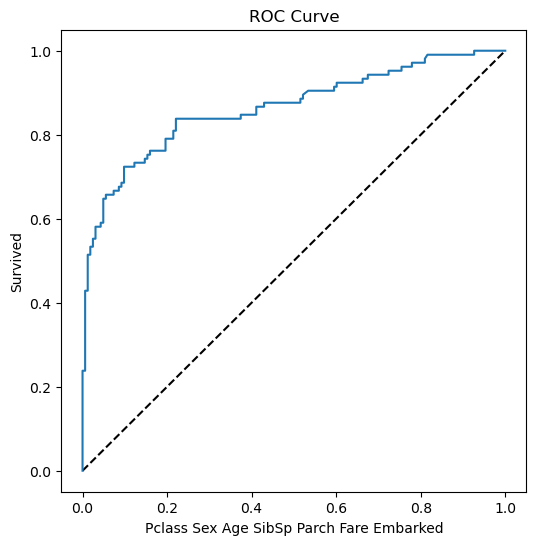

AUC: 0.8643587496348233


In [20]:
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('Pclass Sex Age SibSp Parch Fare Embarked')
plt.ylabel('Survived')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(y_val,y_scores[:,1])
print('AUC: ' + str(auc))

##### 4) Optimisation du modèle

- si vous avez le temps, essayez d'améliorer votre modèle (plus de feature engineering, essayer un autre algorithme qu la régression logistique, ...)
- si vous n'avez pas le temps, décrivez à l'écrit quelques pistes d'optimisation que vous auriez voulu essayer.

In [21]:
# Séparer les passagers en différentes catégories notamment ceux qui ont des titres et ceux qui sont "normaux"
# Utiliser le numéro des cabines comme indicateur de la position à bord du paquebot en relation avec le taux de survie 
# Plus quelqu'un est jeune plus il a de chance de survie
# Ceux appartenant à la première classe on a taux de survie bien plus élevé que les autres

In [22]:
pd.pivot_table(titanic, index = 'Survived', values = [ 'Age', 'SibSp', 'Parch'])

,Age,Parch,SibSp
Survived,,,
0,30.415100,0.329690,0.553734
1,28.549778,0.464912,0.473684
